In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import stopwords # Is been Downloaded
import matplotlib.pyplot as plt
from joblib import dump, load
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from random import randint



In [2]:
PATH = os.getcwd()

In [3]:
PATH

'c:\\Users\\MoAly\\OneDrive - Rihal\\Rihal\\Projects\\RihalIntern\\Stage One'

In [4]:
try:
    os.mkdir(PATH + '/graphs')
except:
    pass

In [5]:
try:
    os.mkdir(PATH + '/tokenizers')
except:
    pass

In [6]:
try:
    os.mkdir(PATH + '/models')
except:
    pass

In [7]:
data = pd.read_csv(PATH + '/data/Stress.csv')
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [8]:
def filtter(text):
    filtered_text = ''
    for char in text:
        if char not in ['/', '%', '&', '#', '@','.',',','(',')','!','"',"'",':',';','/','{','}','[',']','+','=','-','*']: 
            filtered_text += char

    return filtered_text

In [9]:
filtter('%text') #To test the Function

'text'

In [10]:
data['text'].isna().sum() #Check if there is Null values in Text attrepute

0

In [11]:
data['label'].isna().sum() #Check if there is 

0

In [12]:
data['text'] = [str(text) for text in data['text']]

In [13]:
data['text'] = [filtter(text) for text in data['text']]

In [14]:
data['text'] = [text.lower() for text in data['text']]

In [15]:
data.shape

(2838, 116)

In [16]:
set(data['label']) #To insure if the data is clean

{0, 1}

In [17]:
data.isna().values.sum() #There is no Null values

0

In [18]:
categories = set(data['subreddit']) 

In [19]:
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)",he said he had not felt that way before sugget...,33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)",hey there rassistance not sure if this is the ...,2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",my mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]",until i met my new boyfriend he is amazing he ...,239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",october is domestic violence awareness month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [21]:
def counting_summation_per_category(data = data ,categories = categories):
    
    analytical_table = {
        'Categories': [],
        'Total posts' : [],
        'Number of Positive posts' : [],
        'Ratio' : []
    }

    for cat in categories:
        temp_data = data[data['subreddit'] == cat]
        total_len = len(temp_data)
        temp_data_positive = temp_data[temp_data['label'] == 1]
        positive_len = len(temp_data_positive)
        ratio_of_stress = (positive_len / total_len) * 100
        print(f"{cat} having {ratio_of_stress} % of labeld data")
        print("_____________________________________________________")
        analytical_table['Categories'].append(str(cat))
        analytical_table['Total posts'].append(int(total_len))
        analytical_table['Number of Positive posts'].append(int(positive_len))
        analytical_table['Ratio'].append(float(ratio_of_stress))

    analytical_dataframe = pd.DataFrame(analytical_table)
    analytical_dataframe = analytical_dataframe.sort_values(by= 'Ratio')

    plt.bar(analytical_dataframe['Categories'], analytical_dataframe['Ratio'])
    plt.xlabel("categories")
    plt.ylabel("Ratio of stress postes")
    plt.title("No. of Strees posts per Category")
    plt.figure(figsize=(19.2,10.8))
    try:
        plt.savefig(PATH + '/graphs/counting_summation_per_category.png')
    except:
        name = str(randint)
        plt.savefig(PATH + f'/graphs/{name}')
    return plt.show()




ptsd having 56.849315068493155 % of labeld data
_____________________________________________________
homeless having 37.5 % of labeld data
_____________________________________________________
assistance having 36.332179930795846 % of labeld data
_____________________________________________________
domesticviolence having 63.92405063291139 % of labeld data
_____________________________________________________
anxiety having 65.8051689860835 % of labeld data
_____________________________________________________
almosthomeless having 58.75 % of labeld data
_____________________________________________________
survivorsofabuse having 45.714285714285715 % of labeld data
_____________________________________________________
relationships having 44.7463768115942 % of labeld data
_____________________________________________________
food_pantry having 37.83783783783784 % of labeld data
_____________________________________________________
stress having 54.6875 % of labeld data
_____________

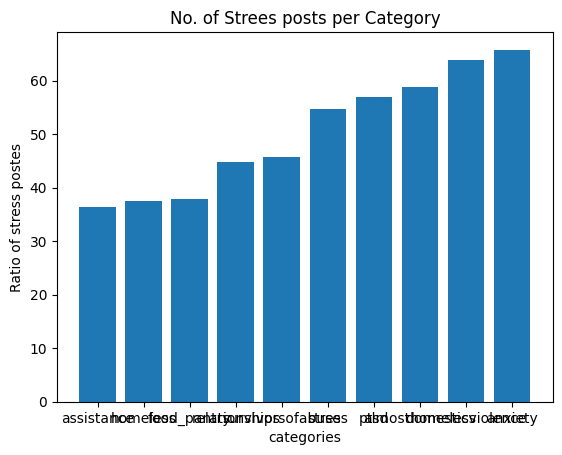

<Figure size 1920x1080 with 0 Axes>

In [22]:
counting_summation_per_category()

In [23]:
stopwordsfile = open(PATH + '//Data//english', "r")

In [24]:
stopwords = stopwordsfile.read()

In [25]:
stopwords

"i\nme\nmy\nmyself\nwe\nour\nours\nourselves\nyou\nyou're\nyou've\nyou'll\nyou'd\nyour\nyours\nyourself\nyourselves\nhe\nhim\nhis\nhimself\nshe\nshe's\nher\nhers\nherself\nit\nit's\nits\nitself\nthey\nthem\ntheir\ntheirs\nthemselves\nwhat\nwhich\nwho\nwhom\nthis\nthat\nthat'll\nthese\nthose\nam\nis\nare\nwas\nwere\nbe\nbeen\nbeing\nhave\nhas\nhad\nhaving\ndo\ndoes\ndid\ndoing\na\nan\nthe\nand\nbut\nif\nor\nbecause\nas\nuntil\nwhile\nof\nat\nby\nfor\nwith\nabout\nagainst\nbetween\ninto\nthrough\nduring\nbefore\nafter\nabove\nbelow\nto\nfrom\nup\ndown\nin\nout\non\noff\nover\nunder\nagain\nfurther\nthen\nonce\nhere\nthere\nwhen\nwhere\nwhy\nhow\nall\nany\nboth\neach\nfew\nmore\nmost\nother\nsome\nsuch\nno\nnor\nnot\nonly\nown\nsame\nso\nthan\ntoo\nvery\ns\nt\ncan\nwill\njust\ndon\ndon't\nshould\nshould've\nnow\nd\nll\nm\no\nre\nve\ny\nain\naren\naren't\ncouldn\ncouldn't\ndidn\ndidn't\ndoesn\ndoesn't\nhadn\nhadn't\nhasn\nhasn't\nhaven\nhaven't\nisn\nisn't\nma\nmightn\nmightn't\nmustn\nmus

In [26]:
X = data['text']
y = data['label']

In [27]:
X.head()

0    he said he had not felt that way before sugget...
1    hey there rassistance not sure if this is the ...
2    my mom then hit me with the newspaper and it s...
3    until i met my new boyfriend he is amazing he ...
4    october is domestic violence awareness month a...
Name: text, dtype: object

In [28]:
X

0       he said he had not felt that way before sugget...
1       hey there rassistance not sure if this is the ...
2       my mom then hit me with the newspaper and it s...
3       until i met my new boyfriend he is amazing he ...
4       october is domestic violence awareness month a...
                              ...                        
2833     her a week ago precious how are you? i ignore...
2834    i dont have the ability to cope with it anymor...
2835    in case this is the first time youre reading t...
2836    do you find this normal? they have a good rela...
2837    i was talking to my mom this morning and she s...
Name: text, Length: 2838, dtype: object

In [29]:
for text in X:
    text = text.lower()


In [30]:
for text in X:
    text = filtter(text)

In [31]:
def stopword_exclude(text, stopwords = stopwords):
    text = text.lower()
    words = text.split()  # Tokenize the text into words
    filtered_text = [word for word in words if word not in stopwords]
    
    return ' '.join(filtered_text)  # Joining words back into a string

        

In [32]:
temp = []


for text in X:
    temp.append(stopword_exclude(text))

    
X = pd.Series(temp)

In [33]:
X.shape

(2838,)

In [34]:
y.shape

(2838,)

In [35]:
X.head()

0    said felt way suggeted go rest trigger ahead y...
1    rassistance sure right place post goes current...
2    mom hit newspaper shocked knows dont like play...
3    met new boyfriend amazing kind sweet good stud...
4    october domestic violence awareness month dome...
dtype: object

In [36]:
tfidf_vectorizer = TfidfVectorizer()

In [37]:
#X = tfidf_vectorizer.fit_transform(X) #If X is been tokenized the model is going to be biased

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [40]:
X_train = tfidf_vectorizer.fit_transform(X_train)

In [42]:
model = SVC()

In [43]:

X_train

<1986x10025 sparse matrix of type '<class 'numpy.float64'>'
	with 70506 stored elements in Compressed Sparse Row format>

In [44]:
y_train

450     0
2551    0
1529    0
343     1
2590    1
       ..
2009    0
1180    0
1344    0
527     1
1289    0
Name: label, Length: 1986, dtype: int64

In [45]:
model.fit(X_train,y_train)

SVC()

In [46]:
sample_text = ["I feel stress because of having lot's of assignments in the collage and I have no time and my gpa is lower then 2"]
sample_text_tokenized = tfidf_vectorizer.transform(sample_text)
prediction = model.predict(sample_text_tokenized)

prediction_label = "Stressed" if prediction[0] == 1 else "Not Stressed"

prediction_label


'Not Stressed'

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


In [48]:
y_pred = model.predict(tfidf_vectorizer.transform(X_test))

In [49]:
precision = precision_score(y_test, y_pred)
precision

0.7095435684647303

In [50]:
recall = recall_score(y_test, y_pred)
recall

0.7880184331797235

In [51]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7276995305164319

In [52]:
from sklearn.ensemble import BaggingClassifier


In [53]:
base_classifier = LogisticRegression(solver = 'sag')


In [54]:
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42, n_jobs=-1)


In [55]:
bagging_classifier.fit(X_train, y_train)


BaggingClassifier(estimator=LogisticRegression(solver='sag'), n_jobs=-1,
                  random_state=42)

In [56]:
bagging_classifier.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'sag',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(solver='sag'),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [68]:
bagging_classifier.predict_proba(tfidf_vectorizer.transform(["i'm feeling bad"]))

array([[0.27041038, 0.72958962]])

In [58]:
y_pred = bagging_classifier.predict(tfidf_vectorizer.transform(X_test))


In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7288732394366197

In [60]:
precision = precision_score(y_test, y_pred)
precision

0.7084188911704312

In [61]:
recall = recall_score(y_test, y_pred)
recall

0.7949308755760369

In [62]:
from joblib import dump, load


In [63]:
dump(tfidf_vectorizer, PATH + '\\tokenizers\\tfidf_vectorizer.joblib') #Save the Tokenizer for Deployment


['c:\\Users\\MoAly\\OneDrive - Rihal\\Rihal\\Projects\\RihalIntern\\Stage One\\tokenizers\\tfidf_vectorizer.joblib']

In [64]:
dump(bagging_classifier,PATH + '\\models\\bagging_classifier.joblib') #Save the model for Deployment


['c:\\Users\\MoAly\\OneDrive - Rihal\\Rihal\\Projects\\RihalIntern\\Stage One\\models\\bagging_classifier.joblib']

In [69]:
bagging_classifier.predict(tfidf_vectorizer.transform(["i'm feeling bad"]))

array([1], dtype=int64)

In [65]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
tfidf = load(PATH + '\\tokenizers\\tfidf_vectorizer.joblib')

x = data['text']
x = tfidf.transform(x)


y = data['label']

x.shape, y.shape


((2838, 9826), (2838,))

In [ ]:
import numpy as np

In [ ]:
d_out = np.mean(np.array(data['confidence'])) #Dropout threshold

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size= 0.3, random_state= 29)
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
nn = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(25, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(d_out),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
precision_metric = tf.keras.metrics.Precision()
recall_metric = tf.keras.metrics.Recall()



nn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', precision_metric, recall_metric])

In [ ]:
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                245675    
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                260       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 245946 (960.73 KB)
Trainable params: 245946 (960.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
nn.fit(X_train.toarray(), y_train, epochs=100, batch_size=2, validation_data=(X_test.toarray(), y_test), callbacks=[early_stopper])


Epoch 1/100
993/993 [==============================] - 8s 7ms/step - loss: 0.6913 - accuracy: 0.5201 - precision_3: 0.5253 - recall_1: 0.6427 - val_loss: 0.6818 - val_accuracy: 0.5540 - val_precision_3: 0.5540 - val_recall_1: 1.0000
Epoch 2/100
993/993 [==============================] - 6s 6ms/step - loss: 0.6854 - accuracy: 0.5242 - precision_3: 0.5271 - recall_1: 0.6801 - val_loss: 0.6700 - val_accuracy: 0.7089 - val_precision_3: 0.7097 - val_recall_1: 0.8030
Epoch 3/100
993/993 [==============================] - 6s 6ms/step - loss: 0.6715 - accuracy: 0.5579 - precision_3: 0.5640 - recall_1: 0.5984 - val_loss: 0.6555 - val_accuracy: 0.7042 - val_precision_3: 0.7696 - val_recall_1: 0.6653
Epoch 4/100
993/993 [==============================] - 6s 6ms/step - loss: 0.6543 - accuracy: 0.5886 - precision_3: 0.6129 - recall_1: 0.5315 - val_loss: 0.6157 - val_accuracy: 0.7160 - val_precision_3: 0.7366 - val_recall_1: 0.7585
Epoch 5/100
993/993 [==============================] - 6s 6ms/step -

In [ ]:
reasults = nn.evaluate(X_test.toarray(), y_test)


27/27 [==============================] - 1s 4ms/step - loss: 0.5474 - accuracy: 0.7277 - precision_3: 0.7871 - recall_1: 0.6970


In [ ]:
print(f"Test Loss: {reasults[0]:.4f}")
print(f"Test Accuracy: {reasults[1]:.4f}")

Test Loss: 0.5474
Test Accuracy: 0.7277


In [ ]:
sample_text = ["I feel so much stress because of having lots of assignments in the collage and I have no time and my gpa is lower then 2"]
sample_text_tfidf = tfidf.transform(sample_text)
prediction = nn.predict(sample_text_tfidf.toarray())
prediction[0][0]

1/1 [==============================] - 0s 141ms/step


0.6679175

In [ ]:

checkpoint_path = PATH + "\\training\\cp.ckpt"

try:
    os.makedir(checkpoint_path)

except:
    pass

checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
nn.fit(X_train.toarray(), y_train, epochs=10, batch_size=64, validation_data=(X_test.toarray(), y_test), callbacks=[early_stopper, cp_callback])

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.5861 - accuracy: 0.6903 - precision_3: 0.7621 - recall_1: 0.5738
Epoch 1: saving model to c:\Users\MoAly\OneDrive - Rihal\Rihal\Projects\RihalIntern\training\cp.ckpt
32/32 [==============================] - 2s 21ms/step - loss: 0.5861 - accuracy: 0.6903 - precision_3: 0.7621 - recall_1: 0.5738 - val_loss: 0.5538 - val_accuracy: 0.7136 - val_precision_3: 0.8065 - val_recall_1: 0.6356
Epoch 2/10
26/32 [=======================>......] - ETA: 0s - loss: 0.5871 - accuracy: 0.6965 - precision_3: 0.7948 - recall_1: 0.5443
Epoch 2: saving model to c:\Users\MoAly\OneDrive - Rihal\Rihal\Projects\RihalIntern\training\cp.ckpt
32/32 [==============================] - 0s 13ms/step - loss: 0.5827 - accuracy: 0.6949 - precision_3: 0.7937 - recall_1: 0.5453 - val_loss: 0.5608 - val_accuracy: 0.7066 - val_precision_3: 0.8171 - val_recall_1: 0.6059
Epoch 3/10
25/32 [======================>.......] - ETA: 0s - loss: 0.5786 - accuracy: 0

In [ ]:
os.listdir(checkpoint_dir)


['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [ ]:
tf.keras.models.save_model(nn, "models/stress.h5")

C:\Users\MoAly\AppData\Local\Temp\ipykernel_16488\2595220572.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(nn, "models/stress.h5")
